In [1]:
%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
from exchangeNets import *
from ownershipNet import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [5]:
def hybridSupplierToOwnerGraph():
    G = nx.Graph()
    
    supplierData = inferredExchangeNets()
    ownerData = ownershipGraph()
    
    names = supplierData.keys()
    for k,i in enumerate(names): G.add_node(i)
        
    for name1 in names:
        for name2 in names:
            if name1 != name2 and len(list(set(supplierData[name1]) & set(ownerData[name2]))):
                G.add_edge(name1,name2)
    
    labels={}
    for k,i in enumerate(names): labels[i] = i
    return G, labels

def buildNamedBusinessGraph(data):
    G = nx.Graph()
    names = data.keys()
    for k,i in enumerate(names): G.add_node(i)
        
    for name1 in names:
        for name2 in names:
            if name1 != name2 and len(list(set(data[name1]) & set(data[name2]))):
                G.add_edge(name1,name2)
    
    labels={}
    for k,i in enumerate(names): labels[i] = i
    return G, labels

def buildBusinessGraph(data):
    G = nx.Graph()
    names = data.keys()
    businesses = list(Counter([item for sublist in data.values() for item in sublist]).keys())
    
    businessMembers = defaultdict(list)
    for b in businesses:
        for name in names:
            if b in data[name]:
                businessMembers[b].append(name)
            
    businessList = businessMembers.keys()
    for k,i in enumerate(businessList): G.add_node(i)
    for b1 in businessList:
        for b2 in businessList:
            if b1 != b2 and len(list(set(businessMembers[b1]) & set(businessMembers[b2]))):
                G.add_edge(b1,b2)
    
    labels={}
    for k,i in enumerate(businessList): labels[i] = i
    return G, labels

def plotGraph(G,labels,colors=None):
    pos=nx.spring_layout(G,k=1)
    nx.draw(G,pos,node_color=colors)
    for label in pos:
        x,y = pos[label]
        plt.text(x,y+0.035,s=labels[label],horizontalalignment='center',fontsize=24)

def saveGraphToFile(G, filename):
    file_ = nx.to_numpy_matrix(G)
    print(file_.shape)
    print()
    np.savetxt(filename,file_, "%d") 

In [24]:
def xptags():
    relationships = {}

    relationships["Eiggy Bread"] = 0
    relationships["Massage Theraphy"] = 0
    relationships["Sandavore Farm"] = 1 #probably from size of farm
    relationships["Stuart Millar Fishing"] = 1 #yes probably on Mull
    relationships["Laig Bay Brewing"] = 1
    relationships["Eddie's Eigg Croft"] = 1
    relationships["Kildonnan Bay Oysters"] = 0
    relationships["Eigg Organics"] = 0
    relationships["Libby Galli Felt"] = 1
    relationships["Kildonnan House"] = 0
    relationships["Lost Map Records"] = 1
    relationships["Laig Farm"] = 0
    relationships["Anead hand knitwear"] = 1
    relationships["Lagerona"] = 0
    relationships["Hebnet Cic"] = 1
    relationships["Scottish Willow Baskets"] = 1
    relationships["Eigg Shop"] = 0
    relationships["Eigg Crafts"] = 1
    relationships["Glebe Barn"] = 0
    relationships['Galmisdale Cafe'] = 0

    return relationships

(20, 20)



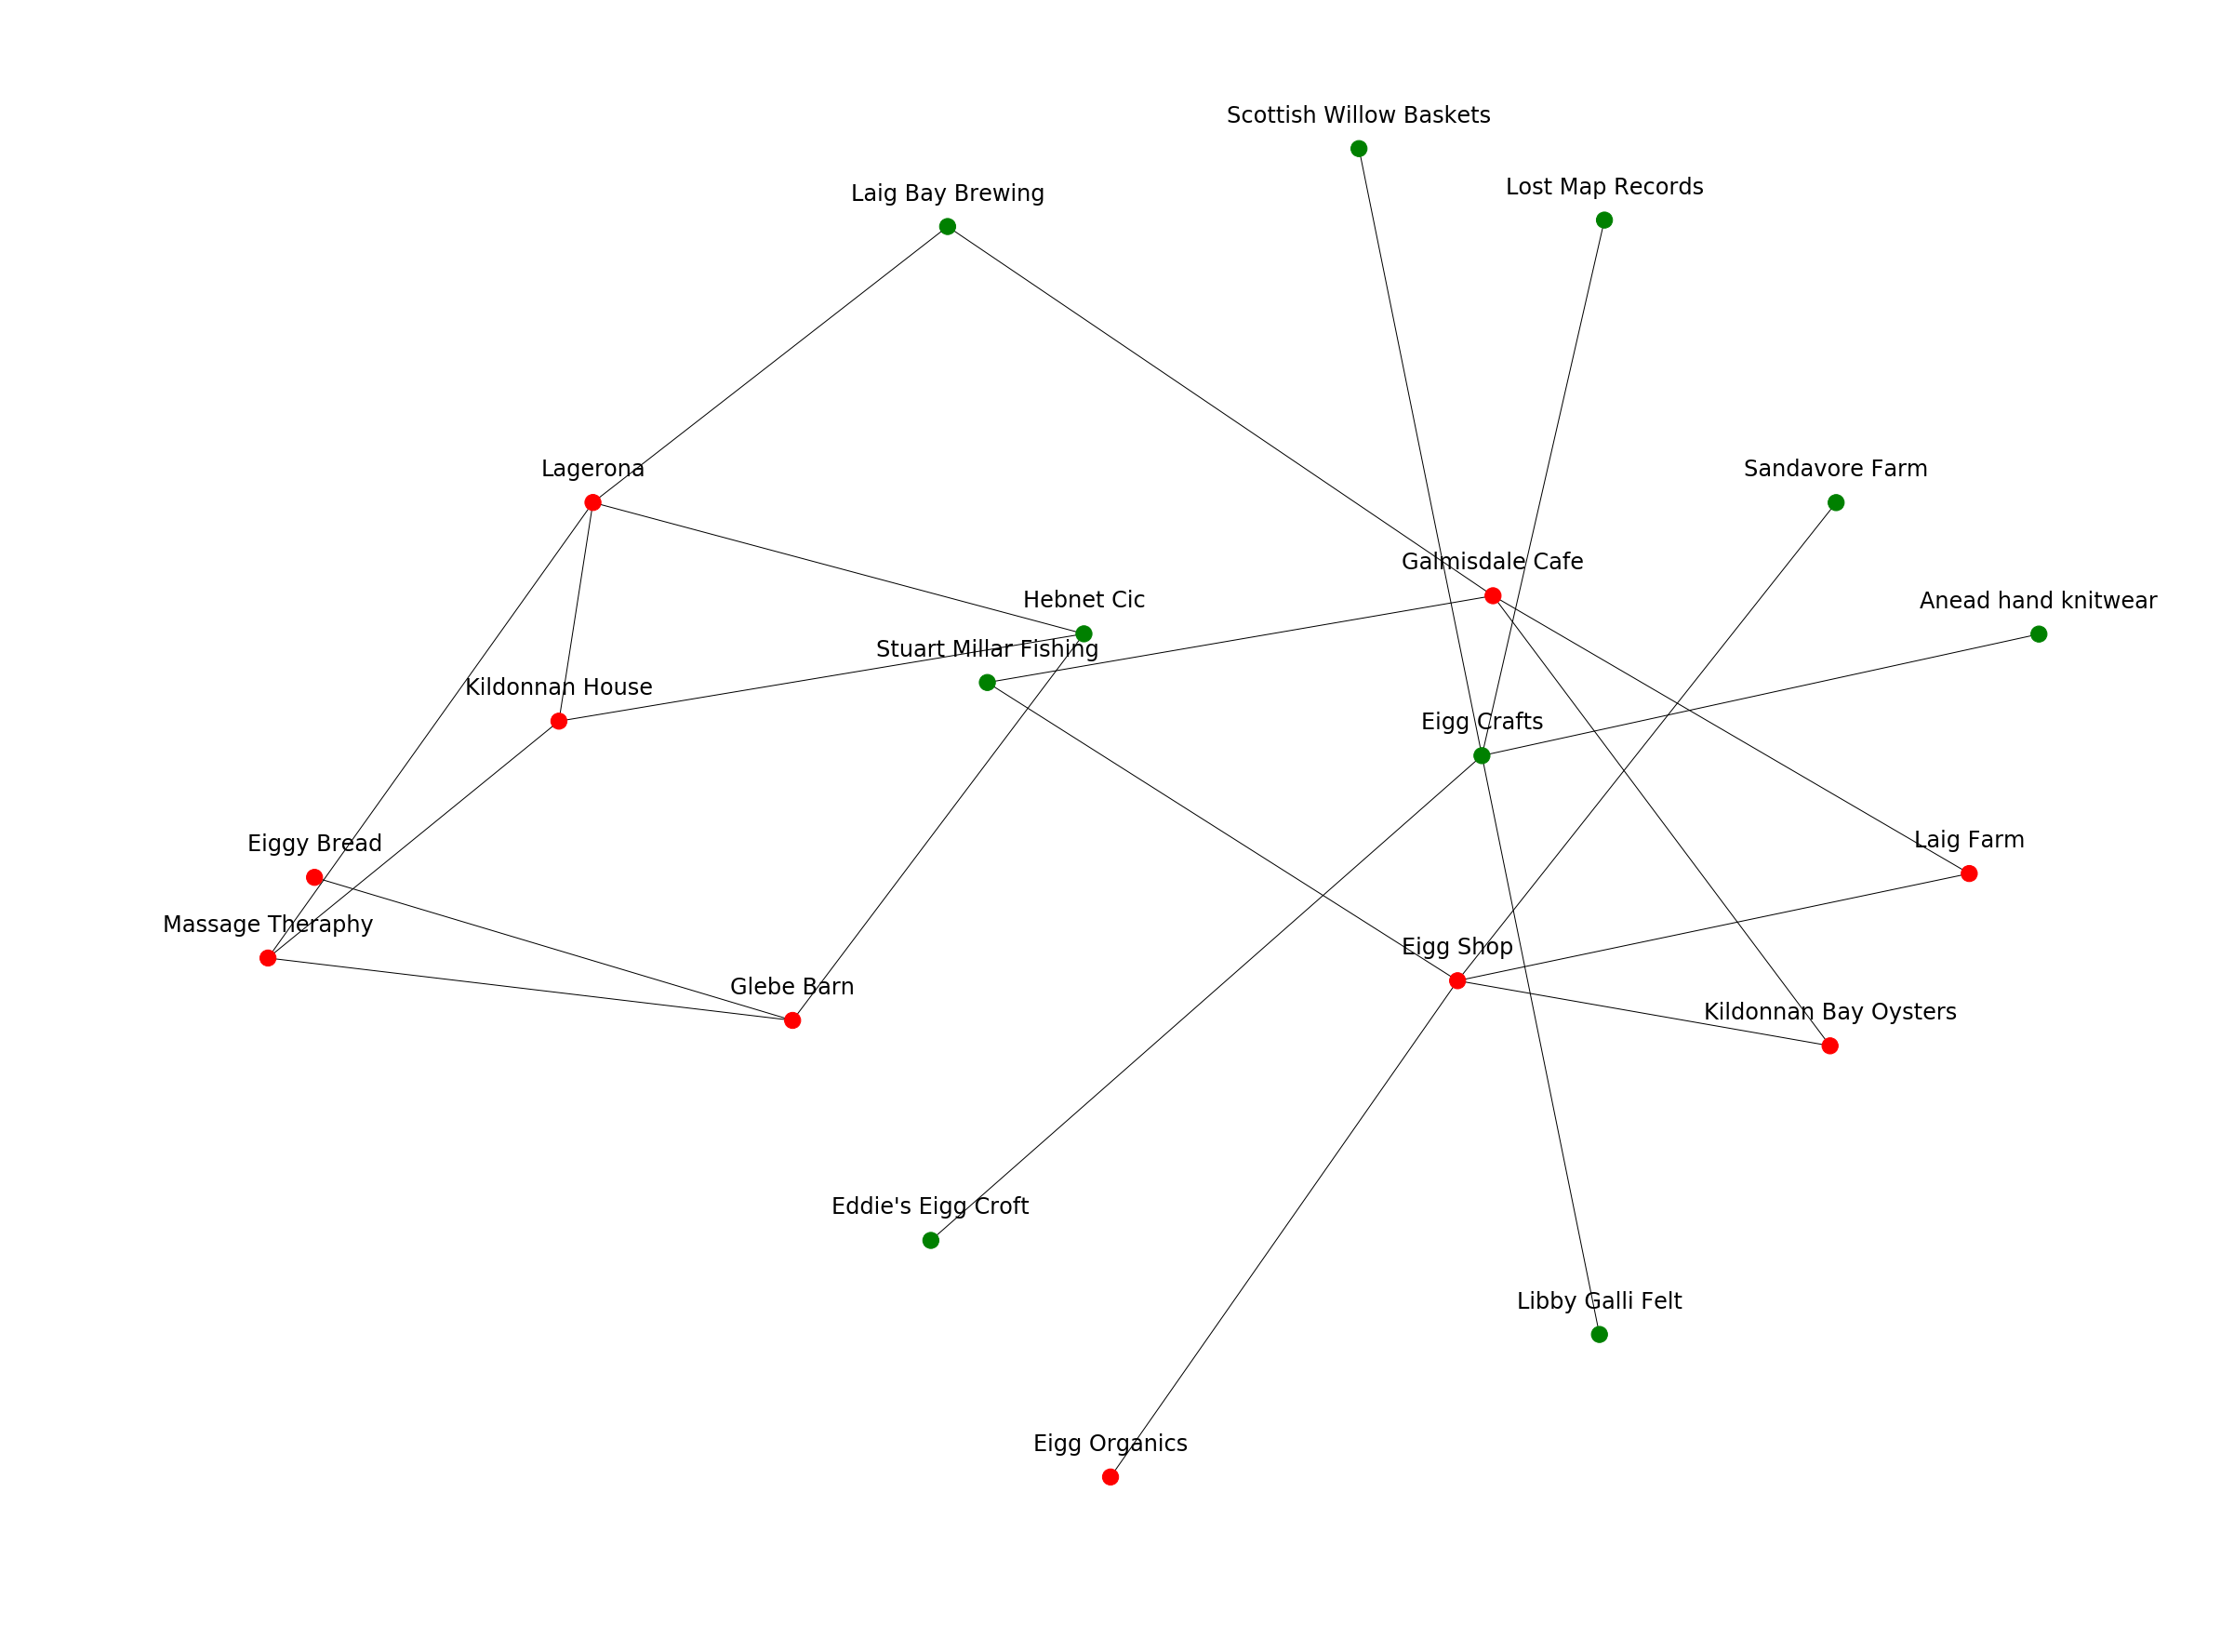

In [30]:
G = nx.Graph()
businesses = exchangesByBusiness()

lst = set()
lst = lst.union(set(businesses.keys()))
for key in businesses:
    lst = lst.union(set(businesses[key]))

lst = list(lst)

for item in lst:
    G.add_node(item)

for key in businesses:
    connections = businesses[key]
    for item in connections:
        G.add_edge(key,item)



labels={}
for k,i in enumerate(lst): labels[i] = i
labels
xp = xptags()

colors = ["red" if xp[x] == 0 else "green" for x in G]
plotGraph(G,labels,colors)

saveGraphToFile(G, "exportByB.txt")
labelsInOrder = list(G.nodes())
attributesInOrder = list(map(lambda x: int(xp[x]),G.nodes()))
np.savetxt('exportByBLabs.txt', labelsInOrder, '%s')
np.savetxt('exportByBAttr.txt', attributesInOrder)

# Base Exchange Networks

In [ ]:
data = uninferredExchangeNets()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

In [ ]:
xp = exportTags()
G,labels = hybridSupplierToOwnerGraph()
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
G.remove_nodes_from([name for name in data.keys() if "Eigg Crafts" in data[name]])
plotGraph(G,labels)
# saveGraphToFile(G, "testest.txt")

In [ ]:
xp = exportTags()
data = inferredExchangeNets()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
colors = ["red" if xp[x] == 0 else "green" for x in G]
plotGraph(G,labels,colors)

# Exports

In [ ]:
data = exportOnlyGraph()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

In [ ]:
data = uninferredExchangeNets()
G,labels = buildBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)

In [ ]:
data = nonExportOnlyGraph()
G,labels = buildNamedBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)


saveGraphToFile(G,'nonExportExchange.txt')
labelsInOrder = list(G.nodes())
#attributesInOrder = list(map(lambda x: int(inPolitics[x]),G.nodes()))
np.savetxt('nonExportExchangeLabels.txt', labelsInOrder, '%s')
#np.savetxt('ownerPoliAttr.txt', attributesInOrder)

In [ ]:
data = inferredExchangeNets()
G,labels = buildBusinessGraph(data)
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
plotGraph(G,labels)